In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import json, time
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter, OrderedDict
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import random
from sklearn.decomposition import LatentDirichletAllocation as LDA
from tqdm import trange
import time
import json, time
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter, OrderedDict

In [ ]:
#read s&p data and process 2010 - 2020
s_p = pd.read_csv('S&P500.csv')
s_p['date'] = s_p["Date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))
start_date = pd.Timestamp('2010-01-01')
end_date = pd.Timestamp('2020-12-31')
s_p = s_p[(s_p['date'] >= start_date) & (s_p['date'] <= end_date)]

In [ ]:
#read daily return data and process 2010 - 2020
df_rets = pd.read_csv('rets_daily.csv') 
df_rets['date'] = df_rets['date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))
start_date = pd.Timestamp('2010-01-01')
end_date = pd.Timestamp('2020-12-31')
df_rets = df_rets[(df_rets['date'] >= start_date) & (df_rets['date'] <= end_date)]
df_rets = pd.merge(df_rets,s_p[['date','Adj Close']],on = 'date')

In [ ]:
df_rets

,permno,date,prc,ret,retx,mcap,in_sp,in_sp_tm5,Adj Close
0,10078,2010-01-04,9.380000,0.001067,0.001067,7.071957e+06,1,1.0,0.016043
1,10104,2010-01-04,24.850000,0.013045,0.013045,1.245288e+08,1,1.0,0.016043
2,10107,2010-01-04,30.950001,0.015420,0.015420,2.727005e+08,1,1.0,0.016043
3,10137,2010-01-04,23.520000,0.001704,0.001704,3.988122e+06,1,1.0,0.016043
4,10138,2010-01-04,54.400002,0.021596,0.021596,1.406425e+07,1,1.0,0.016043
...,...,...,...,...,...,...,...,...,...
2035284,93132,2020-12-31,148.529999,0.003445,0.003445,2.413612e+07,1,1.0,0.006439
2035285,93246,2020-12-31,227.410004,-0.007766,-0.007766,1.429067e+07,0,0.0,0.006439
2035286,93422,2020-12-31,2.390000,-0.016461,-0.016461,5.806171e+05,0,0.0,0.006439
2035287,93429,2020-12-31,93.120003,0.005398,0.005398,1.006087e+07,1,1.0,0.006439


In [ ]:
# #read the merged data with text and ret
# final = pd.read_csv('data.csv')

In [ ]:
# #create stemmer
# analyzer = CountVectorizer(stop_words='english').build_analyzer()
# stemmer = SnowballStemmer('english')
# def own_analyzer(docstr):
#     return [stemmer.stem(wrd) for wrd in analyzer(docstr)]

In [ ]:
# #create dictionary called senti_dict for sentiment analysis
# senti = pd.read_csv('Loughran-McDonald_MasterDictionary_1993-2021.csv')
# senti['Word'] = senti['Word'].str.lower()
# senti['diff'] = senti['Positive'] - senti['Negative']
# senti.drop(senti[senti['diff'] == 0].index, inplace = True)
# senti['Word'] = senti['Word'].apply(lambda x: stemmer.stem(x))
# senti = senti.groupby('Word',as_index = False).sum()
# senti_dict = {}
# senti_dict['Positive'] = []
# senti_dict['Negative'] = []
# for i in range(len(senti)):
#     if senti.iloc[i]['diff'] > 0:
#         senti_dict['Positive'].append(senti.iloc[i]['Word'])
#     else:
#         senti_dict['Negative'].append(senti.iloc[i]['Word'])

In [ ]:
# #def function to score every augement body with
# def find(file):
#     list_word = own_analyzer(file)
#     neg = 0
#     pos = 0
#     total = len(list_word)
#     for word in list_word:
#         if word in senti_dict['Positive']:
#             pos += 1
#         elif word in senti_dict['Negative']:
#             neg += 1
#     s = (pos-neg)/total
#     return s

In [ ]:
# #drop duplicate so that every permno and trade_date only have a news (since there are too much data to do the sentiment analysis)
# #maybe we can add total text in it when we have more time (still 160000 observation left)
# new_df = final.drop_duplicates(subset=['permno', 'trade_date'], keep='first')

In [ ]:
# # Create a copy of the DataFrame
# data = new_df.copy()
# # Create the 'sentiment' column
# data['sentiment'] = None

In [ ]:
# # Score every augmented body to the 'sentiment' column
# for i in trange(len(data)):
#     data.at[i, 'sentiment'] = find(data['augmented body'].iloc[i])

100%|██████████| 171354/171354 [1:17:17<00:00, 36.95it/s]  


In [ ]:
# #new dataset with sentiment score
# data

,permno,trade_date,prc,ret,retx,mcap,in_sp_x,in_sp_tm5_x,Id,in_sp_y,in_sp_tm5_y,TimeStamp,headline,subject,augmented body
0,10104,2016-01-22,34.799999,0.019930,0.019930,1.462025e+08,1,1.0,20160122-144000000-nL8N1560AN-1-2,1,1.0,2016-01-22 09:40:00.457000-05:00,UPDATE 3-SAP lifts 2017 sales goal; takes marg...,"['N2:TECH', 'N2:SWIT', 'N2:RES', 'N2:TMT', 'N2...",UPDATE 3-SAP lifts 2017 sales goal; takes marg...
1,10104,2016-01-29,36.310001,0.027738,0.027738,1.525463e+08,1,1.0,20160129-181943000-nL2N15D02C-2-5,1,1.0,2016-01-29 13:19:43.201000-05:00,CORRECTED-Microsoft's secret weapon for growth...,"['N2:WWW', 'N2:TECH', 'N2:CMPNY', 'N2:SOFW', '...",CORRECTED-Microsoft's secret weapon for growth...
3,10104,2016-02-01,36.320000,0.000275,0.000275,1.525883e+08,1,1.0,20160201-164905000-nL2N15D22P-1-2,1,1.0,2016-02-01 11:49:05.867000-05:00,UPDATE 1-Microsoft's secret weapon for growth ...,"['N2:TECH', 'N2:SMED', 'N2:WWW', 'N2:DEPT', 'N...",UPDATE 1-Microsoft's secret weapon for growth ...
4,10104,2016-02-16,35.700001,0.004502,0.004502,1.499836e+08,1,1.0,20160216-181726000-nL2N15V1EF-1-2,1,1.0,2016-02-16 13:17:26.682000-05:00,BUZZ-Wall St dials up inContact ahead of quart...,"['N2:STX', 'N2:HOT', 'N2:ITSE', 'N2:SOFW', 'N2...",BUZZ-Wall St dials up inContact ahead of quart...
5,10104,2016-03-07,38.360001,0.012404,0.012404,1.611588e+08,1,1.0,20160307-202908000-nL1N16F137-1-2,1,1.0,2016-03-07 15:29:08.220000-05:00,"Microsoft takes on Oracle, opening up database...","['N2:COMP', 'N2:HARW', 'N2:ITSE', 'N2:SOFW', '...","Microsoft takes on Oracle, opening up database..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444604,93429,2020-07-21,93.120003,-0.002143,-0.002143,1.021713e+07,1,1.0,L2N2ES0SA_2007212EZQTJmXxTlZK1Y5Extj4G9F/iRLB6...,1,1.0,2020-07-21 10:20:42.805000-04:00,LIVE MARKETS U.S.-Indexes rise early with ener...,"['G:6J', 'G:A', 'G:B1', 'G:K', 'M:28Q', 'M:3F'...",LIVE MARKETS U.S.-Indexes rise early with ener...
444610,93429,2020-07-22,91.650002,-0.015786,-0.015786,1.005584e+07,1,1.0,L2N2ES1W9_20072126qC63AnIad565hcKJCY0SVOT/c0dT...,1,1.0,2020-07-21 16:26:37.238000-04:00,"LIVE MARKETS U.S.-Dow, S&P 500 gain with energ...","['E:Q', 'G:6J', 'G:A', 'G:B1', 'G:K', 'M:28Q',...","LIVE MARKETS U.S.-Dow, S&P 500 gain with energ..."
444618,93429,2020-07-23,91.209999,-0.004801,-0.004801,1.000756e+07,1,1.0,L2N2ET22D_2007222nUsRnpTOvF+31rTYkF7EEgzwl1S1j...,1,1.0,2020-07-22 16:28:30.627000-04:00,LIVE MARKETS U.S.-Indexes end higher as defens...,"['A:1', 'A:7', 'A:9', 'A:G1', 'B:219', 'E:Q', ...",LIVE MARKETS U.S.-Indexes end higher as defens...
444619,93429,2020-07-31,87.699997,0.009322,0.009322,9.622444e+06,1,1.0,L2N2F02V6_2007312njBuRYadVQONWLF8EsFU5AwEK2SCh...,1,1.0,2020-07-31 13:53:23.273000-04:00,Wall St Week Ahead-Investors raise cash as U.S...,"['A:1', 'G:4', 'G:6J', 'M:1L', 'M:3F', 'M:NP',...",Wall St Week Ahead-Investors raise cash as U.S...


In [ ]:
# #save to csv
# data.to_csv('new_df.csv', index=False)
# read csv
data = pd.read_csv("updated_data.csv")

In [ ]:
#In our strategy, we want to hold the top 10 positve score sentiment stock in one day( which means if it has highest sentiment score today)
#we will buy it the next day morning and sell it the next day afternnon, so that we can get the the t+1 return
#therefore, we should add one column called t+1 return for every permno and trade date (column called ret_t+1)
df_rets['ret_t+1'] = df_rets.groupby('permno')['ret'].shift(-1)

In [ ]:
#clean dataset and merge it with the df_new
df_rets = df_rets.dropna()
data = data.dropna()
df_rets = df_rets.rename(columns={'date': 'trade_date'})
data['trade_date'] = data['trade_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))
fin_df = pd.merge(df_rets[['trade_date','ret_t+1','permno']],data, on = ['trade_date','permno'])

In [ ]:
#groupby trade_date and find top 10 to get the average t+1 return of them
result_df = fin_df.groupby('trade_date').apply(lambda x: x.sort_values(by='sentiment', ascending=False).head(10))
ret_t1_mean = result_df['ret_t+1'].mean(level='trade_date')

/var/folders/wg/swxgv0d56t16stx87mrv80c00000gn/T/ipykernel_37876/718701234.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  ret_t1_mean = result_df['ret_t+1'].mean(level='trade_date')


In [ ]:
#take a look at our portfolio daily return
ret_t1_mean

trade_date
2016-01-04   -0.003088
2016-01-05   -0.007215
2016-01-06   -0.032206
2016-01-07   -0.010017
2016-01-08   -0.012934
                ...   
2020-07-28    0.009203
2020-07-29   -0.014583
2020-07-30   -0.020144
2020-07-31   -0.004179
2020-08-03    0.008988
Name: ret_t+1, Length: 1147, dtype: float64

<AxesSubplot:xlabel='trade_date'>

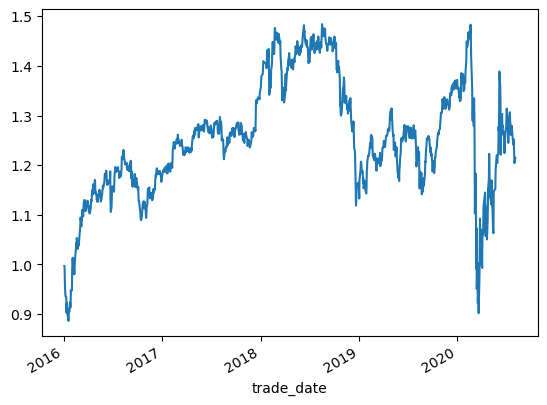

In [ ]:
# do the plot
temp = ret_t1_mean+1
temp.cumprod().plot()

In [ ]:
#Above is our return for our strategy, its about 80% profit in 4 years.

In [ ]:
# Now let's try applying LSTM(Long Short Term Memory)
# Tokenize text data and pad sequences
MAX_NB_WORDS = 10000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['augmented body'].values)
word_index = tokenizer.word_index
MAX_SEQUENCE_LENGTH = 128
X = tokenizer.texts_to_sequences(data['augmented body'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Target variable
Y = data['sentiment'].values

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# LSTM model
EMBEDDING_DIM = 64
lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(lstm_input)
lstm = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(embedding)
dense = Dense(32, activation='relu')(lstm)
dropout = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dropout)

lstm_model = Model(inputs=lstm_input, outputs=output)
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3, batch_size=64)

# Predict sentiment scores using the LSTM model
data['lstm_sentiment'] = lstm_model.predict(pad_sequences(tokenizer.texts_to_sequences(data['augmented body'].values), maxlen=MAX_SEQUENCE_LENGTH))

#groupby trade_date and find top 10 to get the average t+1 return of them
fin2_df = pd.merge(df_rets[['trade_date','ret_t+1','permno']],data, on = ['trade_date','permno'])
result2_df = fin2_df.groupby('trade_date').apply(lambda x: x.sort_values(by='lstm_sentiment', ascending=False).head(10))
ret_t1_mean2 = result2_df['ret_t+1'].mean(level='trade_date')

# do the plot
temp2 = ret_t1_mean2+1
temp2.cumprod().plot()